<a href="https://colab.research.google.com/github/Swapn2/Data-Science-Learnings/blob/main/adaboost_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions


In [2]:
df = pd.DataFrame()

In [3]:
df['x1']=[1,2,3,4,5,6,6,7,9,9]
df['x2']=[5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [4]:
df

,x1,x2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='x1', ylabel='x2'>

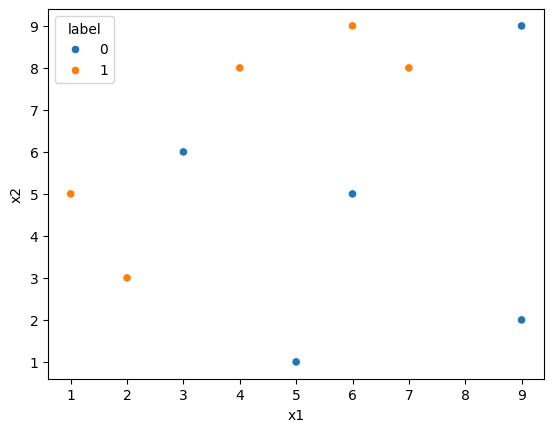

In [5]:
import seaborn as sns
sns.scatterplot(x=df['x1'],y=df['x2'],hue=df['label'])

In [6]:
df['weight'] = 1/df.shape[0]

In [7]:
df

,x1,x2,label,weight
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [8]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(max_depth = 1)

In [9]:
x = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [10]:
x

array([[1, 5],
       [2, 3],
       [3, 6],
       [4, 8],
       [5, 1],
       [6, 9],
       [6, 5],
       [7, 8],
       [9, 9],
       [9, 2]])

In [11]:
dt1.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.625, 0.5, '  False')]

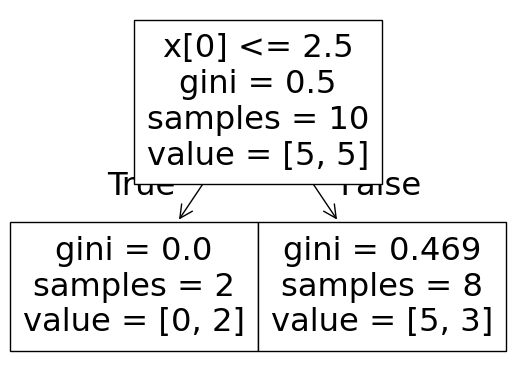

In [12]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

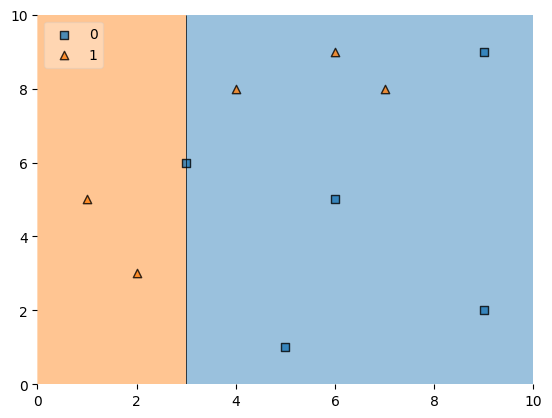

In [13]:
plot_decision_regions(x,y,clf=dt1,legend =2)

In [14]:
df['y_pred'] = dt1.predict(x)

In [15]:
df

,x1,x2,label,weight,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [16]:
def calculate_model_weight(error):
    return .5*np.log((1-error)/(error))

In [17]:
alpha1 = calculate_model_weight(.3)

In [18]:
alpha1

np.float64(0.42364893019360184)

In [19]:
def update_row_weight(row,alpha=.423):
    if row['label'] == row['y_pred']:
        return row['weight']*np.exp(-alpha)
    else:
        return row['weight']*np.exp(alpha)



In [20]:
df['update_weight'] = df.apply(update_row_weight,axis=1)

In [21]:
df

,x1,x2,label,weight,y_pred,update_weight
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,8,1,0.1,0,0.152653
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152653
6,6,5,0,0.1,0,0.065508
7,7,8,1,0.1,0,0.152653
8,9,9,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508


In [22]:
df['normalized_weight'] = df['update_weight']/df['update_weight'].sum()

In [23]:
df

,x1,x2,label,weight,y_pred,update_weight,normalized_weight
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,0,0.065508,0.071475
3,4,8,1,0.1,0,0.152653,0.166559
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,0,0.152653,0.166559
6,6,5,0,0.1,0,0.065508,0.071475
7,7,8,1,0.1,0,0.152653,0.166559
8,9,9,0,0.1,0,0.065508,0.071475
9,9,2,0,0.1,0,0.065508,0.071475


In [24]:
df['cumsum_upper'] = np.cumsum(df['normalized_weight'])
df['cumsum_lower'] = df['cumsum_upper']-df['normalized_weight']
df[['x1','x2','label','weight','y_pred','update_weight','cumsum_lower','cumsum_upper']]

,x1,x2,label,weight,y_pred,update_weight,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,0,0.065508,0.142950,0.214425
3,4,8,1,0.1,0,0.152653,0.214425,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,0,0.152653,0.452458,0.619017
6,6,5,0,0.1,0,0.065508,0.619017,0.690492
7,7,8,1,0.1,0,0.152653,0.690492,0.857050
8,9,9,0,0.1,0,0.065508,0.857050,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [25]:
def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

In [26]:
index_values = create_new_dataset(df)

index_values

[2, 3, 4, 4, 0, 3, 5, 9, 3, 0]

In [27]:
second_df = df.iloc[index_values,[0,1,2,3]]

In [28]:
second_df

,x1,x2,label,weight
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
4,5,1,0,0.1
0,1,5,1,0.1
3,4,8,1,0.1
5,6,9,1,0.1
9,9,2,0,0.1
3,4,8,1,0.1
0,1,5,1,0.1


In [29]:
dt2 = DecisionTreeClassifier(max_depth = 1 )

In [30]:
x = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [31]:
dt2.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 3.5\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.625, 0.5, '  False')]

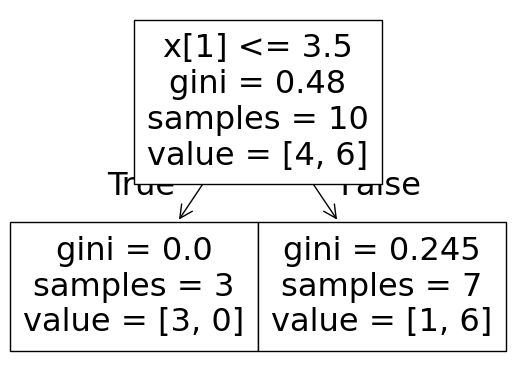

In [32]:
from sklearn.tree import plot_tree
plot_tree(dt2)

<Axes: >

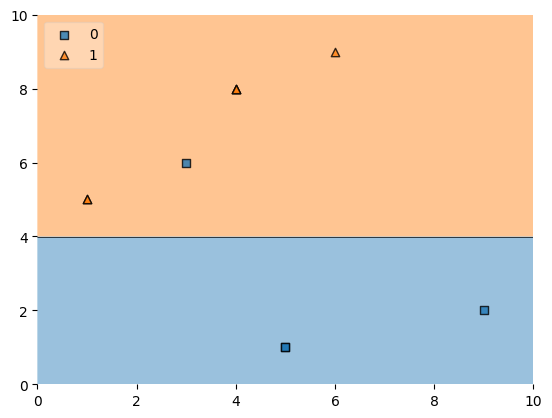

In [33]:
plot_decision_regions(x,y,clf = dt2,legend =2 )

In [34]:
second_df['y_pred'] = dt2.predict(x)

In [35]:
second_df

,x1,x2,label,weight,y_pred
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
4,5,1,0,0.1,0
0,1,5,1,0.1,1
3,4,8,1,0.1,1
5,6,9,1,0.1,1
9,9,2,0,0.1,0
3,4,8,1,0.1,1
0,1,5,1,0.1,1


In [36]:
alpha2 = calculate_model_weight(.2)
alpha2

np.float64(0.6931471805599453)

In [37]:
def update_row_weight(row,alpha=.693):
    if row['label'] == row['y_pred']:
        return row['weight']*np.exp(-alpha)
    else:
        return row['weight']*np.exp(alpha)



In [38]:
second_df['update_weight'] = second_df.apply(update_row_weight,axis=1)

In [39]:
second_df

,x1,x2,label,weight,y_pred,update_weight
2,3,6,0,0.1,1,0.199971
3,4,8,1,0.1,1,0.050007
4,5,1,0,0.1,0,0.050007
4,5,1,0,0.1,0,0.050007
0,1,5,1,0.1,1,0.050007
3,4,8,1,0.1,1,0.050007
5,6,9,1,0.1,1,0.050007
9,9,2,0,0.1,0,0.050007
3,4,8,1,0.1,1,0.050007
0,1,5,1,0.1,1,0.050007


In [40]:
second_df['normalized_weight'] = second_df['update_weight']/second_df['update_weight'].sum()

In [41]:
second_df

,x1,x2,label,weight,y_pred,update_weight,normalized_weight
2,3,6,0,0.1,1,0.199971,0.30763
3,4,8,1,0.1,1,0.050007,0.07693
4,5,1,0,0.1,0,0.050007,0.07693
4,5,1,0,0.1,0,0.050007,0.07693
0,1,5,1,0.1,1,0.050007,0.07693
3,4,8,1,0.1,1,0.050007,0.07693
5,6,9,1,0.1,1,0.050007,0.07693
9,9,2,0,0.1,0,0.050007,0.07693
3,4,8,1,0.1,1,0.050007,0.07693
0,1,5,1,0.1,1,0.050007,0.07693


In [42]:
second_df['cumsum_upper'] = np.cumsum(second_df['normalized_weight'])
second_df['cumsum_lower'] = second_df['cumsum_upper']-second_df['normalized_weight']
second_df[['x1','x2','label','weight','y_pred','update_weight','cumsum_lower','cumsum_upper']]


,x1,x2,label,weight,y_pred,update_weight,cumsum_lower,cumsum_upper
2,3,6,0,0.1,1,0.199971,0.00000,0.30763
3,4,8,1,0.1,1,0.050007,0.30763,0.38456
4,5,1,0,0.1,0,0.050007,0.38456,0.46149
4,5,1,0,0.1,0,0.050007,0.46149,0.53842
0,1,5,1,0.1,1,0.050007,0.53842,0.61535
3,4,8,1,0.1,1,0.050007,0.61535,0.69228
5,6,9,1,0.1,1,0.050007,0.69228,0.76921
9,9,2,0,0.1,0,0.050007,0.76921,0.84614
3,4,8,1,0.1,1,0.050007,0.84614,0.92307
0,1,5,1,0.1,1,0.050007,0.92307,1.00000


In [43]:
second_df

,x1,x2,label,weight,y_pred,update_weight,normalized_weight,cumsum_upper,cumsum_lower
2,3,6,0,0.1,1,0.199971,0.30763,0.30763,0.00000
3,4,8,1,0.1,1,0.050007,0.07693,0.38456,0.30763
4,5,1,0,0.1,0,0.050007,0.07693,0.46149,0.38456
4,5,1,0,0.1,0,0.050007,0.07693,0.53842,0.46149
0,1,5,1,0.1,1,0.050007,0.07693,0.61535,0.53842
3,4,8,1,0.1,1,0.050007,0.07693,0.69228,0.61535
5,6,9,1,0.1,1,0.050007,0.07693,0.76921,0.69228
9,9,2,0,0.1,0,0.050007,0.07693,0.84614,0.76921
3,4,8,1,0.1,1,0.050007,0.07693,0.92307,0.84614
0,1,5,1,0.1,1,0.050007,0.07693,1.00000,0.92307


In [44]:
def create_new_dataset(second_df):

  indices = []

  for i in range(second_df.shape[0]):
    a = np.random.random()
    for index,row in second_df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

In [45]:
index_values = create_new_dataset(df)

index_values

[6, 9, 7, 5, 9, 6, 7, 2, 4, 5]

In [46]:
third_df = df.iloc[index_values,[0,1,2,3]]
third_df

,x1,x2,label,weight
6,6,5,0,0.1
9,9,2,0,0.1
7,7,8,1,0.1
5,6,9,1,0.1
9,9,2,0,0.1
6,6,5,0,0.1
7,7,8,1,0.1
2,3,6,0,0.1
4,5,1,0,0.1
5,6,9,1,0.1


In [47]:
dt3 = DecisionTreeClassifier(max_depth = 1 )

In [48]:
x = third_df.iloc[:,0:2].values
y = third_df.iloc[:,2].values

In [49]:
dt3.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 7.0\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.625, 0.5, '  False')]

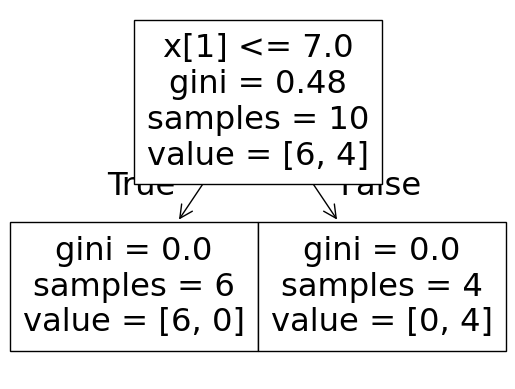

In [50]:
from sklearn.tree import plot_tree
plot_tree(dt3)

<Axes: >

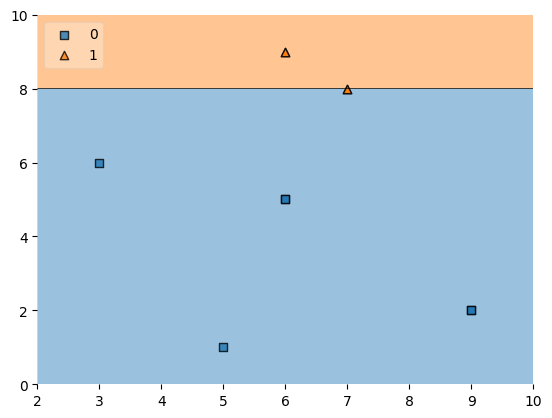

In [51]:
plot_decision_regions(x,y,clf = dt3,legend =2 )

In [52]:
third_df['y_pred'] = dt3.predict(x)

In [53]:
third_df

,x1,x2,label,weight,y_pred
6,6,5,0,0.1,0
9,9,2,0,0.1,0
7,7,8,1,0.1,1
5,6,9,1,0.1,1
9,9,2,0,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,1
2,3,6,0,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,1


In [54]:
alpha3 = calculate_model_weight(.1)
alpha3

np.float64(1.0986122886681098)

In [55]:
def update_row_weight(row,alpha=.423):
    if row['label'] == row['y_pred']:
        return row['weight']*np.exp(-alpha)
    else:
        return row['weight']*np.exp(alpha)



In [56]:
third_df['update_weight'] = third_df.apply(update_row_weight,axis=1)

In [57]:
third_df['normalized_weight'] = third_df['update_weight']/third_df['update_weight'].sum()

In [58]:
third_df

,x1,x2,label,weight,y_pred,update_weight,normalized_weight
6,6,5,0,0.1,0,0.065508,0.1
9,9,2,0,0.1,0,0.065508,0.1
7,7,8,1,0.1,1,0.065508,0.1
5,6,9,1,0.1,1,0.065508,0.1
9,9,2,0,0.1,0,0.065508,0.1
6,6,5,0,0.1,0,0.065508,0.1
7,7,8,1,0.1,1,0.065508,0.1
2,3,6,0,0.1,0,0.065508,0.1
4,5,1,0,0.1,0,0.065508,0.1
5,6,9,1,0.1,1,0.065508,0.1


In [59]:
third_df['cumsum_upper'] = np.cumsum(third_df['normalized_weight'])
third_df['cumsum_lower'] = third_df['cumsum_upper']-third_df['normalized_weight']
third_df[['x1','x2','label','weight','y_pred','update_weight','cumsum_lower','cumsum_upper']]

,x1,x2,label,weight,y_pred,update_weight,cumsum_lower,cumsum_upper
6,6,5,0,0.1,0,0.065508,0.0,0.1
9,9,2,0,0.1,0,0.065508,0.1,0.2
7,7,8,1,0.1,1,0.065508,0.2,0.3
5,6,9,1,0.1,1,0.065508,0.3,0.4
9,9,2,0,0.1,0,0.065508,0.4,0.5
6,6,5,0,0.1,0,0.065508,0.5,0.6
7,7,8,1,0.1,1,0.065508,0.6,0.7
2,3,6,0,0.1,0,0.065508,0.7,0.8
4,5,1,0,0.1,0,0.065508,0.8,0.9
5,6,9,1,0.1,1,0.065508,0.9,1.0


In [60]:
def create_new_dataset(third_df):

  indices = []

  for i in range(third_df.shape[0]):
    a = np.random.random()
    for index,row in third_df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

In [61]:
index_values = create_new_dataset(df)

index_values

[3, 7, 0, 0, 3, 5, 8, 1, 6, 1]

In [62]:
fourth_df = df.iloc[index_values,[0,1,2,3]]
fourth_df

,x1,x2,label,weight
3,4,8,1,0.1
7,7,8,1,0.1
0,1,5,1,0.1
0,1,5,1,0.1
3,4,8,1,0.1
5,6,9,1,0.1
8,9,9,0,0.1
1,2,3,1,0.1
6,6,5,0,0.1
1,2,3,1,0.1


In [63]:
print(alpha1,alpha2,alpha3)

0.42364893019360184 0.6931471805599453 1.0986122886681098


In [64]:
query  = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1])

In [65]:
dt2.predict(query)

array([1])

In [66]:
dt3.predict(query)

array([0])

In [67]:
alpha1*1+alpha2*1+alpha3*(-1)

np.float64(0.01818382208543734)

In [68]:
np.sign(.018)

np.float64(1.0)

In [69]:
query  = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([0])

In [70]:
dt2.predict(query)

array([1])

In [71]:
dt3.predict(query)

array([1])

In [72]:
alpha1*(-1)+alpha2*(-1)+alpha3*(1)

np.float64(-0.01818382208543734)

In [73]:
np.sign(-.018)

np.float64(-1.0)